# K-Means clustering

**Steps:**

1. Decide n - clusters.

2. initialise n random centroids.

3. Assign cluster.(assign centroids to all the points according to the nearest centroid)

<- Cycle between 3 and 4 ->

4. Move centroids.(find the centroid of all the n clusters and assign the new centroid.)

5. The finish condition is two consecutive iterations have the same centroid values.

# Elbow method

The way we can decide how many clusters to be defined.

we need to iterate over 1-n clusters and find the corresponding k number centroids and find the WCSS(weighted squared sum) for each point .

we get an elbow curve and we find out the first point(elbow point) which have less steepness.

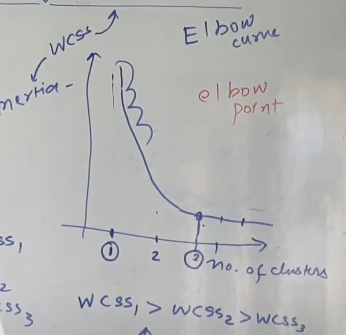

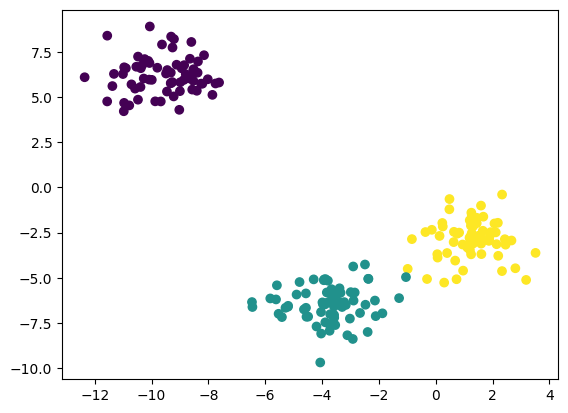

In [97]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
x,y,centers=make_blobs(n_samples=200,n_features=2,centers=3,return_centers=True)
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

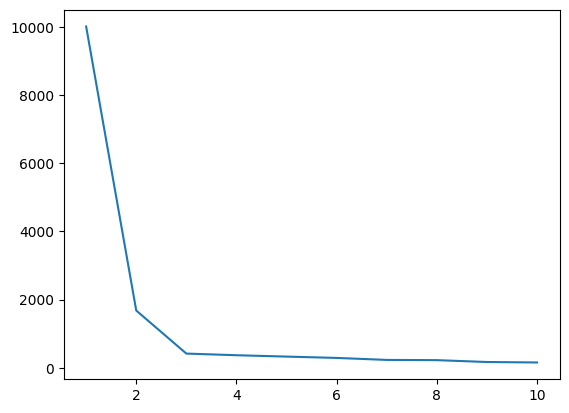

In [98]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

In [99]:
km=KMeans(n_clusters=3)
pred=km.fit_predict(x)

1.0
KNN: [[-9.57186021  6.19980294]
 [-3.7650065  -6.43839772]
 [ 1.25743432 -2.86973293]]
original: [[-9.62686686  6.50001595]
 [-3.78738653 -6.39541277]
 [ 1.2451501  -2.86808304]]


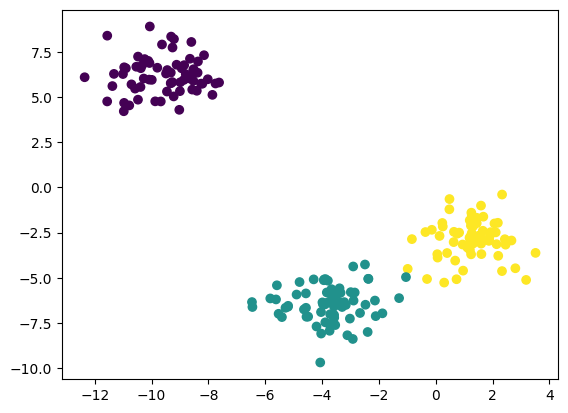

In [100]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,pred))
plt.scatter(x[:,0],x[:,1],c=pred)
print("KNN:",km.cluster_centers_)
print("original:",centers)

initial centroids: [[-6.45085805 -6.61226388]
 [ 2.14031035 -3.14011666]
 [-2.91872917 -8.37848841]]


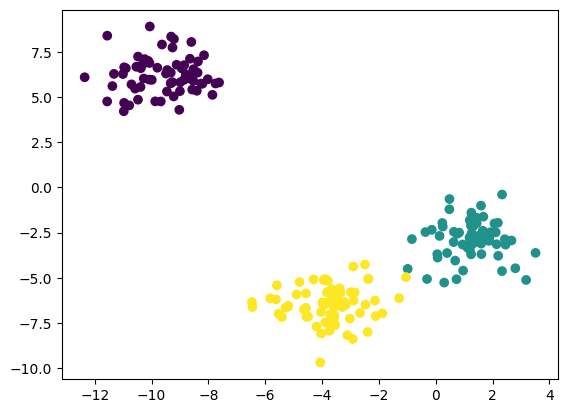

In [141]:
# code from scrath
class kmeans:
    def __init__(self,n_cluster=2,max_iter=10):
        self.cluster=n_cluster
        self.max_iter=max_iter
        self.centroids=None
    def fit_predict(self,x:np.ndarray):
        self.centroids=x[np.random.randint(0,x.shape[0],size=self.cluster)]
        print("initial centroids:",self.centroids)
        for _ in range(self.max_iter):
            cluster_group=self.assign_clusters(x)
            new_centroids=[]
            for j in range(self.cluster):
                new_centroids.append([np.mean(x[cluster_group==j,0]),np.mean(x[cluster_group==j,1])])
            self.centroids=new_centroids
        return cluster_group
    def assign_clusters(self,x:np.ndarray):
        cluster_group=np.ndarray((x.shape[0]))
        for i in range(x.shape[0]):
            min=10000000000
            cluster=0
            for j in range(self.cluster):
                dist=np.sqrt(np.dot(x[i]-self.centroids[j],x[i]-self.centroids[j]))
                if(dist<min):
                    min=dist
                    cluster=j
            cluster_group[i]=cluster
        return cluster_group
model=kmeans(n_cluster=3,max_iter=100)
pred=model.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=pred)